# 数据可视化

本节主要讲解最基本的可视化函数，进而讲解简便的表数据的可视化，以及空间数据的可视化。主要涉及到包 `ggplot2` 和 `tmap` 。

一般情况下，对数据进行可视化所绘制出来的图，都是矢量图，即记录了图上每一个元素在什么位置、有什么形状的、显示什么颜色等。
尽管这些图可以输出成位图格式的图片文件，但是在 R 语言中这些都是按照矢量图进行处理的。

本节主要使用这个数据进行展示。

In [1]:
demo.table <- read.csv("data/LNHP03.csv")
demo.table[,c("X", "Y")] <- lapply(demo.table[,c("X", "Y")], as.numeric)
demo.table[,c("PURCHASE", "FLOORSZ")] <- lapply(demo.table[,c("PURCHASE", "FLOORSZ")], as.integer)

## 基本的可视化函数

### 绘图元素

绘制图形，尤其是矢量图，是一个非常复杂的过程，需要有很多的配置设置。
但是有一些函数基本上包揽了这些工作，直接使用该函数，填写一些参数，就可以创建一个图表。
这些函数主要有：

- `plot()` 绘制散点图、折线图
- `hist()` 绘制直方图
- ...

最具代表性的就是用于绘制散点图的 `plot()` 函数。例如将 `PURCHASE` 和 `FLOORSZ` 的值绘制成散点图，可使用如下代码

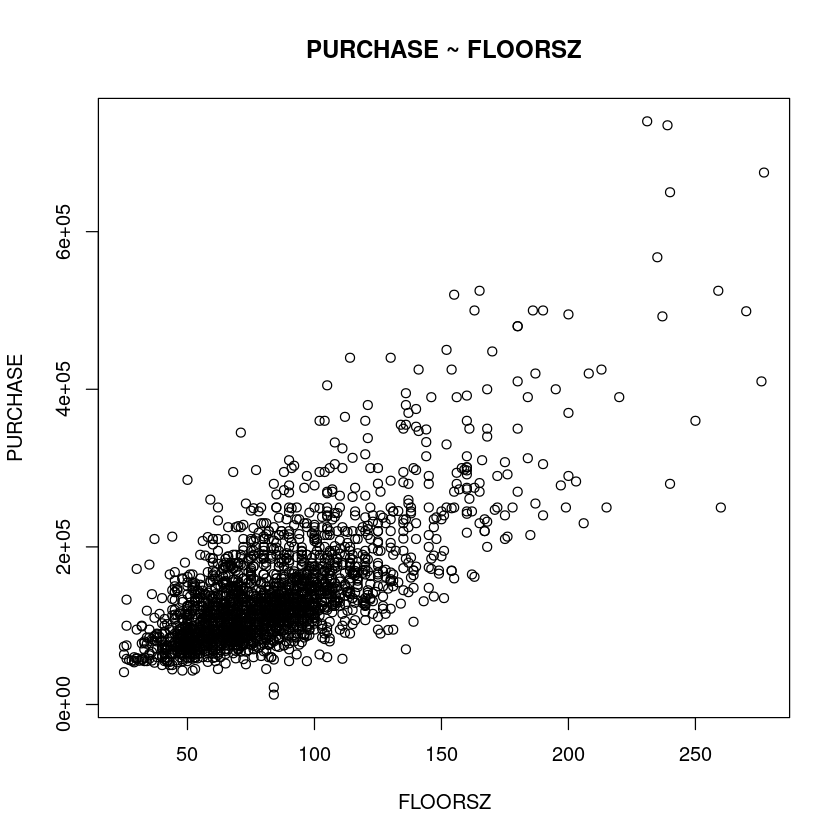

In [2]:
plot(demo.table$FLOORSZ, demo.table$PURCHASE, main = "PURCHASE ~ FLOORSZ", xlab = "FLOORSZ", ylab = "PURCHASE")

甚至可以只对一个向量输出散点图

In [ ]:
plot(demo.table$PURCHASE, xlab = "", ylab = "PURCHASE")

该函数具有很多配置参数，

| 参数名        | 类型      | 含义                                                         | 默认值 |
| ------------- | --------- | ------------------------------------------------------------ | ------ |
| `x` `y`       | vector    | 每个点的坐标                                                 |        |
| `type`        | character | 输出图片的类型。`p`指散点图，`l`指折线图，`b`指同时输出点和线（不重叠），`o`指重叠输出点和线，`h`指以类似于直方图的形式输出。 | `"p"`  |
| `xlim` `ylim` | vector    | $x$ 轴和 $y$ 轴的显示范围，分别是一个具有两个 numeric 类型元素的向量，前者作为下界，后者作为上界。 |        |
| `log`         | character | 指定哪些轴需要做对数变换。如果取值 `"x"` 或 `"y"` 则只在这些轴上变换，如果取值 `"xy"` 或 `"yx"` 则在两个轴上都做变换。 |        |
| `main` `sub`  | character | 图片主标题和副标题。一般传入一个字符串。                     |        |
| `xlab` `ylab` |           | $x$ 轴和 $y$ 轴的标题。一般传入一个字符串。                  |        |
| ...           | 变长参数  | 传给更底层绘图函数的参数。                                   |        |

在该函数的基础上，可以增加一些辅助点、辅助线、文字等。分别使用 `points()` `abline()` `grid()` `text()` 等函数。

In [ ]:
# 辅助线
plot(demo.table$PURCHASE)
abline(h = 600000)

In [ ]:
# 背景格网、辅助线，文字
plot(demo.table$FLOORSZ, demo.table$PURCHASE, xlim = c(0, 300), main = "PURCHASE ~ FLOORSZ", xlab = "FLOORSZ", ylab = "PURCHASE")
grid(nx = 20, ny = 20)   # x轴和 y轴格点的数量
abline(a = 0, b = 1000)  # 斜率和截距
text(290, 320*1000, expression("£1000"/m^2))  # 文字的横纵坐标以及内容

### 颜色和形状

以上这些函数中，绘图元素的颜色，都是通过 `col` 参数设置的。例如我们将上一个图中的辅助线改为红色

In [ ]:
# 背景格网、辅助线，文字
plot(demo.table$FLOORSZ, demo.table$PURCHASE, xlim = c(0, 300), main = "PURCHASE ~ FLOORSZ", xlab = "FLOORSZ", ylab = "PURCHASE")
grid(nx = 20, ny = 20)   # x轴和 y轴格点的数量
abline(a = 0, b = 1000, col = "red")  # 斜率和截距
text(290, 320*1000, expression("£1000"/m^2), col = "red")  # 文字的横纵坐标以及内容

颜色可以通过 `colors()` 函数查看内置的颜色，或者使用 `rgb()` `hsv()` `hcl()` 函数生成颜色值。这里不做过多介绍。

点的形状是通过 `pch` 参数进行控制的，R 中一共包含 25 种点的样式，传入对应样式的序号即可。大小通过 `cex` 参数配置，接收一个浮点数，类似于放大缩小的比例，取值大于1则变大，小于1则变小。

线的形状是通过 `lty` 参数进行控制的，R 种一共包含 6 种线的样式，传入对应样式的序号即可。线的粗细通过 `lwd` 参数配置，接收一个浮点数，可以理解为线纵向所占的像素数。

字体的控制比较复杂，这里只介绍一下 `family` 参数，相当于在 Word 种所设置的字体，下面示例种填入的 `"serif"` 指默认的衬线字体，一般情况下系统会选择 Times New Roman 。当然这里也可以指定一些其他字体，但并不是所有字体都是 R 所支持的。

In [ ]:
# 背景格网、辅助线，文字
plot(demo.table$FLOORSZ, demo.table$PURCHASE, xlim = c(0, 300), main = "PURCHASE ~ FLOORSZ", xlab = "FLOORSZ", ylab = "PURCHASE", pch = 3, cex = 0.8)
grid(nx = 20, ny = 20)   # x轴和 y轴格点的数量
abline(a = 0, b = 1000, col = "red", lty = 2, lwd = 2, )  # 斜率和截距
text(300, 300*1000, expression("£1000"/m^2), col = "red", family = "serif", cex = 1.5, adj = c(1, 0))  # 文字的横纵坐标以及内容

有关这些绘图函数的详细情况，请查看《R 语言空间数据处理于分析实践教程》。

## 基础数据的可视化

用于数据可视化的包有很多，但是这里主要介绍使用 `ggplot2` 包进行可视化的方法。

函数包 `ggplot2` 是由 Hadley Wickham 等人开发和维护的数据可视化工具函数包，是当前 R 中最流行的可视化函数包之一。
与大多数数据可视化函数包不同，函数包 ggplot2 基于 2005 年 Wilkinson 提出的图形语法开发，由一系列的独立可视化组件构成，这些组件可以被称为“图层”。
因此，ggplot2 的功能非常强大，可以根据不同的可视化问题与需求，量身定制不同的可视化图形。

尽管 ggplot2 功能强大，但常用的可视化图无非是散点图、折线图、柱状图、饼图、直方图、箱线图等类型，而且理论上这些图都可以使用 plot 以及其他一些 R 自带的函数进行实现。
因此本节着重介绍这个包一些特有的功能，使用这些功能可以大大简化绘图流程。

In [ ]:
library(ggplot2)

### 散点图

本节采用 iris 数据集进行演示。该数据集中包含了三种类型的鸢尾花的一些形态指标。

In [ ]:
data(iris)
head(iris)

我们使用这种方式展示字段 `Sepal.Length` 和 `Sepal.Width` 之间的关系，并给不同的鸢尾花类型使用不同的符号。

In [ ]:
ggplot(iris) + geom_point(aes(x = Sepal.Length, y = Sepal.Width, color = Species))  # 根据颜色区分鸢尾花
ggplot(iris) + geom_point(aes(x = Sepal.Length, y = Sepal.Width, shape = Species))  # 根据点形区分鸢尾花

可见，`ggplot` 包首先要使用 `ggplot()` 函数创建一个绘图环境，然后在后面叠加所需要绘制的图层符号。

上面所用到的 `aes()` 函数，是指定将数据映射到图层的参数， `x` `y` 表示点的坐标，此外 `shape` `size` `color` `group` 等绘图参数，分别将不同的数据映射到了不同的绘图元素上。
这个函数可以放在 `gemo_points()` 中，也可以放在 `ggplot()` 中。

In [ ]:
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, group = Species, color = Species)) + geom_point()

对于散点图，我们还可以添加一个回归曲线，使用 `geom_smooth()` 函数。如果 `aes()` 函数中对数据进行了分组，那么，`geom_smooth()` 就会对每个组分别进行回归。

In [ ]:
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) + geom_point() + geom_smooth(method = lm)

我们也可以将其他两个参数加入，字段 `Petal.Length` 用大小表达，字段 `Petal.Width` 用颜色表达

In [ ]:
ggplot(iris) + geom_point(aes(x = Sepal.Length, y = Sepal.Width, shape = Species, size = Petal.Length, color = Petal.Width))

我们也可以更换一个比较学术化的主题，只需要在后面增加一个 `theme_bw()` 函数，即可进行主题设置

In [ ]:
ggplot(iris) + 
    geom_point(aes(x = Sepal.Length, y = Sepal.Width, shape = Species)) + 
    theme_bw()

### 折线图

折线图一般用于表示一个变量随另一个变量的变化趋势，一般情况下这两个变量不会是一个类别变量，而且横轴的取值一般是连续型变量，或者是等差数列。

这里使用 `airquality` 数据集，来展示对于时间序列的可视化。这个数据集中包含了纽约1973年5-9月每日空气质量。
我们需要用不同的线绘制出不同月份每天气温变化图。

In [ ]:
head(airquality)

In [ ]:
ggplot(airquality) +
    geom_line(aes(x = Day, y = Temp, color = as.factor(Month)))

这里使用到了一个 `as.factor()` 函数，根据这个名字，可以看到这个函数是将变量转换为 `factor` 类型的变量，这也是 R 中一个常用的数据类型——因子类型。
因子类型比较类似于实验中的控制变量，这种变量可以是整数，可以是字符串，但必须是有限个的，而且一般情况下每个因子有不同的重复实验。
这个案例中，月份就可以认为是因子。

当然，折线图也不一定必须是时间序列的，例如下面这个数据集 `CO2` 描述了不同二氧化碳浓度下耐寒植物CO2摄取的差异。
我们可以分别画出不同植物在低温处理和非低温处理下吸收二氧化碳能力随二氧化碳浓度的变化图

In [ ]:
CO2.edit <- CO2
CO2.edit$Plant <- sapply(CO2$Plant, FUN = function(x) {
    paste(substring(x, 1, 1), substring(x, 3, 3), sep = "")
})
ggplot(CO2.edit) +
    geom_line(aes(x = conc, y = uptake, linetype = Treatment)) +
    facet_wrap(~ Plant)

上述代码中，使用 `facet_wrap()` 函数进行分幅绘图，接收一个 `formula` 对象，公式右边列出分组依据。还接受两个参数 `nrow` 和 `ncol` ，和创建矩阵时的用法一样。

### 柱状图

柱状图一般用于大小的比较，横轴上一般是一个类别变量，纵轴一般是一个整型变量或连续型变量。
如果已经统计好值，则使用 `geom_col()` 函数，如果需要 `ggplot` 进行统计，则使用 `geom_bar()` 函数。

例如，我们统计三种鸢尾花品种花萼和花瓣的形态数据的平均值，使用柱状图进行展示。

我们首先对该数据进行一个分组统计，统计出各组内指标的平均值。

In [ ]:
library(dplyr)
iris.summary <- data.frame(summarise(group_by(iris, Species), Sepal.Length.mean = mean(Sepal.Length), Sepal.Width.mean = mean(Sepal.Width)), row.names = "Species")
iris.summary

其次注意到，这种形式的数据集，并不便于使用 `ggplot` 函数包进行可视化，因为数据映射中的 `y` 对应在了两列中。我们需要对其进行转换。

In [ ]:
iris.summary.reshape <- Reduce(rbind, lapply(rownames(iris.summary), FUN = function (x) {
    data.frame(
        Species = x,
        Measurements = colnames(iris.summary),
        Data = as.numeric(iris.summary[x,])
    )
}))
iris.summary.reshape

> 这里使用到 `Reduce(f, x)` 函数，可以实现对 $x$ 的第一、二两个元素运行函数 $f$，得到的结果与第三个元素再运行函数 $f$，以此类推，最后将 $x$ 的所有元素整合到一起。
> 具体使用方法这里不做展开

然后可以对 `iris.reshape` 进行可视化，使用两个柱子分别显示两组变量

In [ ]:
ggplot(iris.summary.reshape) +
    geom_col(aes(x = Species, y = Data, fill = Measurements), position = position_dodge2(padding = 0,  preserve = "single"))

### 箱线图

箱线图是将一组数据按照大小顺序排列后进行绘制的，包含6个数据节点，分别表示出数据的上边缘、上四分位数点Q3（数据从小到大排列后处在75％位置上的数据）、中位数、下四分位数Q1（数据从小到大排列后处在25％位置上的数据）、下边缘和异常值。由此，箱线图很形象地分为中心、延伸以及分布状态的全部范围。

例如我们分析鸢尾花数据集中各个指标的分布，仍然需要先将数据集进行格式转换。

In [ ]:
measurements.colnames <- colnames(iris)[-c(which(colnames(iris) == "Species"))]
iris.reshape <- Reduce(rbind, (lapply(unique(iris$Species), FUN = function (x) {
    item <- filter(iris, Species == x)
    Reduce(rbind, lapply(1:nrow(item), FUN = function (r) {
        data.frame(
            Species = x,
            Measurements = measurements.colnames,
            Data = as.numeric(item[r, measurements.colnames])
        )
    }))
})))
head(iris.reshape)

然后使用 `gemo_boxplot()` 函数绘制箱线图，$x$ 轴设置为品种，$y$ 轴设置为数值，然后根据指标进行分幅。

In [ ]:
ggplot(iris.reshape) + geom_boxplot(aes(x = Species, y = Data, fill = Species)) + facet_wrap(~ Measurements)

这样可以明显看出数据分布的方式。

上面这个数据处理的方式是比较通用的，可以写成如下函数，方便以后使用。这个函数主要具有如下4个参数：

- `df` 要处理的表数据
- `first.names` 数据处理的第一索引，将出现在结果的第一列中。
    - 如果是字符串，则取该字符串对应的列
    - 如果是字符串向量，则将该字符串向量作为第一索引
    - 如果是逻辑值，则将行名作为第一索引
    - 如果是数值，则将数值对应的列作为第一索引
- `col.names` 要提取数据的列。如果为 `NULL` 则取除了 `first.names` 之外的所有列。这些列名的取值将出现在第二列。
- `output.names` 输出数据的列名。
    - 如果不填，则程序自动处理列名。
    - 如果填一个，则第二列用该值，第一列用根据 `first.names` 提取的列名，第三列默认名称 `Value`
    - 如果填两个，则前两列使用该值，第三列默认名称 `Value`
    - 如果填三个，则三列全都使用该值


In [ ]:
df.reshape.ggplot <- function (df, first.names, col.names=NULL, output.names=c()) {
    if (class(df) != "data.frame") {
        stop("df must be a data.frame")
    }
    first.index <- c()
    second.index <- c()
    use.first.name <- "primary.names"
    if (class(first.names) == "character" && length(first.names) == 1 && first.names %in% colnames(df)) {
        first.index <- df[[first.names]]
        second.index <- colnames(df)[-c(which(colnames(df) == first.names))]
        use.first.name <- first.names
    } else if (length(first.names) == nrow(df)) {
        first.index <- first.names
        second.index <- colnames(df)
    } else if (class(first.names) == "logical" && length(first.names) == 1 && first.names == TRUE) {
        first.index <- rownames(df)
        second.index <- colnames(df)
    } else if (class(first.names) %in% c("numeric", "integer") && length(first.names) == 1 && first.names == TRUE) {
        first.names <- as.integer(first.names)
        first.index <- df[, first.names]
        second.index <- colnames(df)[-c(first.names)]
        use.first.name <- colnames(df)[first.names]
    } else {
        stop("first.names accept a vector or a column name/index")
    }
    df.reshape <- Reduce(rbind, (lapply(unique(first.index), FUN = function (x) {
        item <- df[first.index == x,]
        Reduce(rbind, lapply(1:nrow(item), FUN = function (r) {
            data.frame(
                "primary.names" = x,
                "secondary.names" = as.character(second.index),
                "value" = as.vector(as.matrix(item[r, second.index]))
            )
        }))
    })))
    if (length(output.names) == 0) {
        colnames(df.reshape)[1] <- use.first.name
    } else if (class(output.names) == "character") {
        if (length(output.names) == 3) {
            colnames(df.reshape) <- output.names
        } else if (length(output.names) == 2) {
            colnames(df.reshape)[1:2] <- output.names
        } else if (length(output.names) == 1) {
            colnames(df.reshape)[1:2] <- c(use.first.name, output.names)
        } else {
            warning("length of output.names is not between 1 and 3")
        }
    }
    df.reshape
}

### 直方图

饼图主要展示各个值在不同区间内分布的频数，用于研究数据的概率分布。

例如对鸢尾花数据集，我们可以分别查看三种花的 `Sepal.Length` 指标的分布情况。

In [ ]:
ggplot(iris) + geom_histogram(aes(x = Sepal.Length), binwidth = 0.2) + facet_wrap(~ Species, ncol = 1)

如果 `aes()` 中指定的是 `y` 则直方图变为横向，

In [ ]:
ggplot(iris) + geom_histogram(aes(y = Sepal.Length), binwidth = 0.2) + facet_wrap(~ Species)

## 空间数据可视化

空间数据可视化又称专题制图，即制作一个专题地图。专题地图就需要至少有四个要素：符号、图例、指北针、比例尺。这些可以通过程序自动添加。

对于空间数据，其可视化有一个难点，即在二维地图上的 $x,y$ 坐标已经被要素的空间位置所占据，只能通过颜色、大小、粗细来表示数值型变量的大小，通过形状等表示类别型变量的大小。
如果是三维地图，可以使用 $z$ 轴来展示数值型变量的大小，也可以做出一些效果不错的专题图。但是三维可视化仍然存在很多问题，这里还是主要介绍二维可视化。

我们以这个数据为例进行演示。

In [ ]:
demo.shp <- rgdal::readOGR("data/LNHP03.shp")

当加载了 `sp` 包之后，`plot()` 函数就可以直接绘制空间数据，用法如下

In [ ]:
library(sp)
plot(demo.shp)

也可以显示空间面数据

In [ ]:
data(LondonBorough, package = "GWmodel")
plot(londonborough)

二者也可以进行叠加显示

In [ ]:
plot(londonborough)
points(demo.shp)

事实上， `ggplot` 包也可以做空间数据可视化，但是这里主要推荐使用 `tmap` 包，来提供更强大的可视化功能。

In [ ]:
library(tmap)

### 绘制符号

`tmap` 包的使用思路是，使用 `tm_shape()` 添加一组要素，然后根据要素的类型，选择 `tm_symbol()` `tm_polygon()` 等函数进行可视化，

将数据 `demo.shp` 使用点符号对变量 `PURCHASE` 进行可视化，给 `col` 参数传入一个列名，让函数根据该列的值进行可视化，用 `size` 参数传入点的大小。

In [ ]:
tm_shape(demo.shp) + tm_symbols(col = "PURCHASE", size = 0.2)

如果我们不想要这么多分级，那么可以使用参数 `n` 对其进行设置

In [ ]:
tm_shape(demo.shp) + tm_symbols(col = "PURCHASE", size = 0.2, n = 3)

我们也可以使用参数 `palette` 换一个配色方案

In [ ]:
tm_shape(demo.shp) + tm_symbols(col = "PURCHASE", size = 0.2, palette = "Blues")

也可以同时可视化多组变量，并进行分幅输出

In [ ]:
tm_shape(demo.shp) + tm_symbols(col = c("PURCHASE", "FLOORSZ", "UNEMPLOY", "PROF"), size = 0.2) + tm_facets()

对于面要素，使用方法也是类似的，例如我们使用 `World` 数据集，来绘制全球人口分布图

In [ ]:
data(World)
tm_shape(World) + tm_polygons("life_exp")

我们也可以在一幅图上输出多个要素，这里使用 `rivers` 数据集，该数据集包括了全球的主要河流；以及 `metro` 数据，包含了多年全球各国人口。

In [ ]:
data(rivers)
tm_shape(World) + tm_polygons(col = "white") + tm_shape(rivers) + tm_lines(col = "blue")

In [ ]:
data(metro)
tm_shape(World) + tm_polygons(col = "white") + tm_shape(metro) + tm_symbols(size = "pop2020", col = "")

### 指北针和比例尺

指北针和比例尺的添加也是非常方便的，使用 `tm_compass()` 函数和 `tm_scale_bar()` 函数。

In [ ]:
tm_shape(demo.shp) + tm_symbols(col = "PURCHASE", size = 0.2) + tm_compass() + tm_scale_bar()

图例是自动添加的，而指北针和比例尺的默认的位置是不太合适的。

如果仅仅是调整位置，这两个函数都接收 `position` 参数，该参数接收一个二元向量，可以是字符串或 $[0,1]$ 区间内的数值。
如果是字符串，第一个值取 `left``center``right` 中的一个；第二个值取 `top``center``bottom` 中的一个。
可以是全小写，也可以是全大写。如果是全大写，则忽略边距。

In [ ]:
tm_shape(demo.shp) + tm_symbols(col = "PURCHASE", size = 0.2) + tm_compass(position = c("right", "top")) + tm_scale_bar(position = c("left", "top"))

### 图名和图例

图名和图例的添加和配置，和指北针、比例尺有些不同。图例是自动添加的，图名是需要指定的，他们都是在 `tm_layout()` 函数中进行设置的。

In [ ]:
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))

第一个参数就是 `title` ，即图标题，其位置使用 `main.position` 参数进行设置。对于图例的位置，使用 `legend.posistion` 参数设置。

该函数还有非常多的参数，这里难以一一介绍。可以使用下面这个方式，查看所有函数的帮助文档。对于 `tm_layout()` 函数，其参数默认值都还是比较合适的，一般就调整一下位置。

## 制图结果的输出

制图结果我们需要输出到文件中，以在论文或其他文档中使用。
在 R 中输出图片的方式，是先创建一个绘图设备，然后使用语句进行绘图，最后关闭该设备，即可得到文件。
在 R 控制台中，默认的绘图设备是控制台的一个新窗口，在 Jupyter 中是一个 cell 的输出空间，在 RStudio 中是专门用于显示图片的子窗。

创建绘图设备有几种类型，输出栅格图的 `png` `jpg` 等，输出矢量图的 `eps` `pdf` 等。在 Windows 上，还有 `emf` 这种设备，可以直接嵌入到 Office 中。

关闭绘图设备的函数是 `dev.off()`。

### 位图输出

这里以 `png` 为例展示输出位图图片的方式。

In [ ]:
png(filename = "output-03/PURCHASE.png", width = 1024, height = 1024, units = "px", res = 300, pointsize = 12)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()

该函数中有以下几个参数：

- `width` `height` 是设置图片宽高的，参数 `units` 是指宽高设置数值的单位。
- `units` 可以取 `px` 表示像素，也可以取 `cm` `in` 表示长度。而不同单位的设置方法，也会影响 `res` 的效果。
- `res` 是指 PPI（Pixel Per Inch） ，即图像的采样率（在图像中，每英寸所包含的像素数目）
- `pointsize` 是绘图点大小，单位是 $1/72$。

关于这些参数的设置，我们可以对比以下几张图。

In [ ]:
png(filename = "output-03/PURCHASE-2400px-300dpi-12.png", width = 2400, height = 2400, units = "px", res = 300)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-1200px-300dpi-12.png", width = 1200, height = 1200, units = "px", res = 300)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-1200px-72dpi-12.png", width = 1200, height = 1200, units = "px", res = 72)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-1200px-72dpi-6.png", width = 1200, height = 1200, units = "px", res = 72, point = 6)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-1200px-72dpi-18.png", width = 1200, height = 1200, units = "px", res = 72, point = 18)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-8in-300dpi-12.png", width = 8, height = 8, units = "in", res = 300)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-4in-300dpi-12.png", width = 4, height = 4, units = "in", res = 300)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-4in-72dpi-12.png", width = 4, height = 4, units = "in", res = 72)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-4in-72dpi-6.png", width = 4, height = 4, units = "in", res = 72, point = 6)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()
png(filename = "output-03/PURCHASE-4in-72dpi-18.png", width = 4, height = 4, units = "in", res = 72, point = 18)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()

可以看到，图片尺寸 $l$、PPI $p$、点大小 $s$ 都对生成的图片有影响。我们分别对 `units` 是物理长度和像素两种情况进行分析。

由于 R 中所绘制的图都是矢量图，就像在一张 A4 纸上绘制函数图像一样。
例如，当我们需要在图上绘制 $(2,2)$ 这个点时，如何确定这个点应该画在哪里？
我们首先假定以 A4 纸的左下角为原点，沿纸边缘为坐标轴，1 cm 为单位长度。那么  $(2,2)$ 就绘制在了距离原点 (2 cm, 2 cm) 的位置。
那如果我们规定 2 cm 为单位长度，这个点就会被绘制到 (4 cm, 4 cm) 的位置。
但是，实际上，为了让绘图内容以最大化的方式占满绘图空间，单位长度是根据绘制内容进行确定的，而且两个方向上的单位长度不一定一样。

那如果我们有一个长 10 宽 10 的正方形，想要最大化绘制在 A4 纸上，并且要在外面留下一定长度的边距，那么就需要计算一下这个正方形的各个格点的坐标。
此时如果其他要求不变，要把这个正方形绘制到一张 A2 纸（A4纸的四倍）上，此时最然正方形的长宽还是 10 单位长度，但是一个单位长度的实际物理长度就变大了。
那么如果这个正方形内部有 64 个等间距的格点，相比在 A4 纸上绘制，这 64 个格点之间的间距就要大很多。
这就是输出图片尺寸 $l$ 的影响。

但是实际上，无论是打印机、绘图仪还是纸笔，在绘图的时候，都是以一个很小的正方形代替一个数学意义上的点，这个点可以大可以小，类似于圆珠笔和记号笔的笔画差异。
当我们用圆珠笔画点的时候，画出来的点在物理尺寸上比较小，但是用记号笔时，画出来的点物理尺寸就比较大。
虽然这些点中心的位置是相同的，但是点的尺寸是不相同的。
使用粗的笔时，如果要让看起来形状和细的笔形状差不多，那这个符号就要画的大一些。
这就是输出点大小 $s$ 的影响。

那么现在如果我们把这张纸扫描成图片，那么这个扫描仪每个像素的尺寸就决定了图片的清晰度。
如果这个扫描仪每英寸有 72 个像素（72 PPI），其输出图片的尺寸就会比每英寸有 300 个像素的扫描仪小很多。
如果我们都是用 300 PPI 的扫描仪，扫描 A2 纸得到的图像大小就会是扫描 A4 纸得到的图像大小的 4 倍。
这就是 PPI $p$ 的影响。

所以，如果我们把 `units` 设置为物理长度，生成的位图的像素数就是宽高 $(w,h)$ 与 PPI 的乘积，字体、符号的大小通过点大小 $s$ 控制。

当 `units` 是像素时，程序需要保证输出的图片像素数是固定的，此时程序需要根据输出像素数和 PPI 来确定绘图区域的物理尺寸，进一步确定绘图单位长度。
例如，如果指定图片宽和高的像素数是 1200 px ，输出 PPI 是 300 ，那么绘图区域的物理尺寸就是 4 in。
如果指定图片宽和高的像素数改为是 2400 px，那么物理尺寸就是 8 in。
如果指定图片宽和高的像素数是 1200 px，把输出 PPI 改为 72，则绘图区域物理尺寸就是 $16\frac{2}{3}$ in。
剩下的就之前的过程没有区别了。

> 需要指出的是，当图片放在电脑中时，是没有 DPI 的概念的。DPI 是指每英寸点数，当图片还是电脑中的文件时，只存在像素数，不存在物理尺寸。
只有当图片打印到纸上，或者显示到显示器上，此时图片被绘制出来，具有了物理尺寸，才涉及到 DPI 。
总的来说，同样一张图片，第一次打印出来占满一张 A4 纸，第二次打印出来占四分之一张 A4 纸，那么可以说第二次的 DPI 是第一次的两倍。
很多期刊投稿时对 DPI 有要求，而且不同类型的图片要求不同，在输出图片的时候， `res` 参数的值需要灵活设置。
即使设置了 `res` 参数为 300 ，但如果图片尺寸过小，排版时被放大，就依然有可能达不到印刷要求。
最保险的办法是直接根据纸张最大的尺寸绘制图片，选择最大的 PPI ，当然这就会大大增加图片的大小。
如果图片太多，导致超出了投稿文件容量上限，此时就需要根据图片实际排版，确定合适的尺寸。
因此，建议 `units` 参数传入物理长度，而不建议使用像素数。

对于 tmap 包绘制的图，该包提供了一个函数 `tmap_save()` 来保存图片。
该函数第一个参数接收 tmap 相关绘图函数的返回值，参数 `filename` 为输出文件名，`width``height``units` 与 `png` 函数相同，`dpi` 与 `res` 对应，此外还有一些其他设置参数。

In [ ]:
m <- tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
tmap_save(m, filename = "output-03/PURCHASE_tmap.png", width = 8, height = 8, units = "in", dpi = 300)

### 矢量图输出

对于矢量图来说，其格式非常的多，而且不同系统的支持也不一样。
在 Office 系列软件中，使用的 emf 格式的矢量图。在 LaTeX 等软件中，支持 eps 格式的矢量图。
虽然 PDF 格式是基本通用的，在任何系统上都能打开，但是也不能嵌入到 Word 中。
而 SVG 格式可以嵌入到 Word 中，基本也可以在各个系统上打开。但是其对于中文的处理还有一定的问题。

这里以生成 PDF 格式和 SVG 格式的图片为例，演示如何输出矢量图。

In [ ]:
pdf(file = "output-03/PURCHASE.pdf", width = 8, height = 8, pointsize = 12)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()

In [ ]:
svg(file = "output-03/PURCHASE.svg", width = 8, height = 8, pointsize = 12)
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()

可以发现，对于矢量图，只需要设置宽高和点大小即可，使用起来还是比较方便的。当然还有很多其他参数，例如字体的设置等，这里就不一一介绍了，只演示一下如何输出衬线字体的图片。

In [ ]:
svg(file = "output-03/PURCHASE_serif.svg", width = 8, height = 8, pointsize = 12, family = "serif")
tm_shape(demo.shp) + 
    tm_symbols(col = "PURCHASE", size = 0.2) + 
    tm_compass(position = c("right", "top")) + 
    tm_scale_bar(position = c("right", "bottom")) +
    tm_layout("Map of Housing Price", main.title.position = c("left", "top"), legend.position = c("left", "bottom"))
dev.off()